In [255]:
import numpy as np
 
data = np.array([[10, 7, 4], [3, 2, 1]])
data

array([[10,  7,  4],
       [ 3,  2,  1]])

In [256]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [257]:
class Perceptron:
    
    def __init__(self, eta=0.10, epochs=50, is_verbose = False):
        
        self.eta = eta
        self.epochs = epochs
        self.is_verbose = is_verbose
        self.list_of_errors = []
        
    
    def predict(self, x):
        
        ones = np.ones((x.shape[0],1))
        x_1 = np.append(x.copy(), ones, axis=1)
        #activation = self.get_activation(x_1)
        #y_pred = np.where(activation >0, 1, -1)
        #return y_pred
        return np.where(self.get_activation(x_1) > 0, 1, -1)
        
    
    def get_activation(self, x):
        
        activation = np.dot(x, self.w)
        return activation
     
    
    def fit(self, X, y):
        
        self.list_of_errors = []
        
        ones = np.ones((X.shape[0], 1))
        X_1 = np.append(X.copy(), ones, axis=1)
 
        self.w = np.random.rand(X_1.shape[1])
        
        for e in range(self.epochs):
 
            error = 0
            
            activation = self.get_activation(X_1)
            delta_w = self.eta * np.dot((y - activation), X_1)
            self.w += delta_w
                
            error = np.square(y - activation).sum()/2.0
                
            self.list_of_errors.append(error)
            
            if(self.is_verbose):
                print("Epoch: {}, weights: {}, error {}".format(
                        e, self.w, error))

In [258]:
X = np.array([
    [2., 4.,  20.],  # 2*2 - 4*4 + 20 =   8 > 0
    [4., 3., -10.],  # 2*4 - 4*3 - 10 = -14 < 0
    [5., 6.,  13.],  # 2*5 - 4*6 + 13 =  -1 < 0
    [5., 4.,   8.],  # 2*5 - 4*4 + 8 =    2 > 0
    [3., 4.,   5.],  # 2*3 - 4*4 + 5 =   -5 < 0 
])

In [259]:
y = np.array([1, -1, -1, 1, -1])

In [260]:
perceptron = Perceptron(eta=0.001, epochs=100, is_verbose=True)            
perceptron.fit(X, y)

Epoch: 0, weights: [-0.16419065  0.71979393  0.03405962 -0.0429017 ], error 397.92030547167604
Epoch: 1, weights: [-0.21851471  0.65608693 -0.08007314 -0.05690939], error 23.6383464000459
Epoch: 2, weights: [-0.24936112  0.62359731 -0.08920284 -0.06436826], error 11.076254274541142
Epoch: 3, weights: [-0.27386924  0.59845862 -0.08159401 -0.0701928 ], error 9.229867173732444
Epoch: 4, weights: [-0.29518223  0.57642022 -0.07207705 -0.07526856], error 7.978489244354087
Epoch: 5, weights: [-0.31404994  0.55657259 -0.06306675 -0.07979381], error 6.976225227553366
Epoch: 6, weights: [-0.33079486  0.53859112 -0.05488665 -0.08384551], error 6.16800010183064
Epoch: 7, weights: [-0.34564707  0.52226768 -0.04751515 -0.08747568], error 5.515858922262089
Epoch: 8, weights: [-0.35880305  0.50742956 -0.04088007 -0.09072808], error 4.989417935275295
Epoch: 9, weights: [-0.37043739  0.49392416 -0.03490772 -0.09364152], error 4.564212834316363
Epoch: 10, weights: [-0.3807065   0.48161494 -0.02953044 -0.

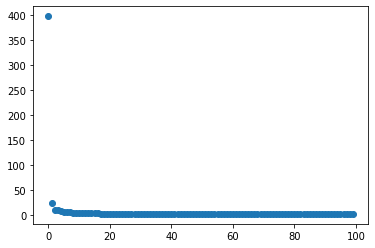

In [261]:
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)

In [262]:
df = pd.read_csv('iris.csv',header=0)

In [263]:
df = df.iloc[:10, :].copy()

In [264]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [265]:
df['Species'] = df['Species'].apply(lambda x: 1 if x == 'Iris-setosa' else -1)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
5,6,5.4,3.9,1.7,0.4,1
6,7,4.6,3.4,1.4,0.3,1
7,8,5.0,3.4,1.5,0.2,1
8,9,4.4,2.9,1.4,0.2,1
9,10,4.9,3.1,1.5,0.1,1


In [266]:
X = df.iloc[0:100, :-1].values
y = df['Species'].values

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [280]:
p = Perceptron(eta = 0.001, epochs=100,is_verbose=True) 

In [281]:
p.fit(X_train, y_train)

Epoch: 0, weights: [0.59395375 0.61821219 0.06159611 0.14806139 0.27302242 0.40051058], error 8.13496671716821
Epoch: 1, weights: [ 0.56205202  0.55543899 -0.0053246   0.08575273  0.22063711  0.44269238], error 5.534638746567735
Epoch: 2, weights: [ 0.53195061  0.50799576 -0.05572762  0.03762782  0.18135825  0.48387308], error 3.937276923279169
Epoch: 3, weights: [ 5.03690073e-01  4.71953223e-01 -9.37582209e-02  2.55690712e-04
  1.51917103e-01  5.23513735e-01], error 2.921427248309097
Epoch: 4, weights: [ 0.47725773  0.44438633 -0.12251165 -0.02893851  0.12986785  0.56127601], error 2.2489224204560037
Epoch: 5, weights: [ 0.45260495  0.42311841 -0.14429976 -0.05188968  0.11337925  0.59696612], error 1.784144007851815
Epoch: 6, weights: [ 0.42965977  0.40653032 -0.16084992 -0.07005408  0.10107923  0.63049343], error 1.4490154578796228
Epoch: 7, weights: [ 0.40833597  0.39341827 -0.17345335 -0.08452982  0.09193881  0.66183995], error 1.1978866232283933
Epoch: 8, weights: [ 0.38853954  0.

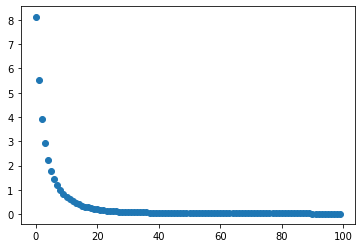

In [282]:
plt.scatter(range(p.epochs), p.list_of_errors)

In [277]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [278]:
X = scale.fit_transform(X)

In [283]:
p = Perceptron(eta = 0.01, epochs=100,is_verbose=True) 

In [284]:
p.fit(X_train, y_train)

Epoch: 0, weights: [0.62984497 0.22609444 0.33982884 0.86443019 0.00194874 0.36087877], error 13.735220131210601
Epoch: 1, weights: [ 0.58037177  0.15476527  0.25718776  0.76875282 -0.07070636  0.40320801], error 9.263645822442667
Epoch: 2, weights: [ 0.53424583  0.10278208  0.19590106  0.69236526 -0.12545948  0.44531666], error 6.52797174093927
Epoch: 3, weights: [ 0.49142004  0.06504995  0.15053865  0.63070703 -0.16667602  0.48640399], error 4.797685140149442
Epoch: 4, weights: [ 0.45178705  0.03778853  0.11705039  0.58034829 -0.19763248  0.52594095], error 3.6599505658368923
Epoch: 5, weights: [ 0.41520116  0.01819595  0.09241531  0.53870503 -0.2207911   0.56359572], error 2.8797115911828923
Epoch: 6, weights: [ 0.38149401  0.0041983   0.07438004  0.50382636 -0.23800501  0.59917861], error 2.3216925003636044
Epoch: 7, weights: [ 0.35048577 -0.00573703  0.06126368  0.47423569 -0.25067132  0.63260144], error 1.9068630760474028
Epoch: 8, weights: [ 0.32199295 -0.01274038  0.05181231  0

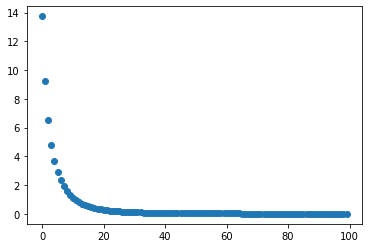

In [285]:
plt.scatter(range(p.epochs), p.list_of_errors)